<b><font size="6">|Time Series|Sales Forecasting</font></b>

* **Author**: Your Name
* **Student ID**: Your Student ID
* **Date:**: 23-June-2025

<b><font size="5">Instructions</font></b>

Carefully read and follow these instructions:

- Enter your personal details in the cell above.
- All practical work must be uploaded to `BC Connect` on the completion of the test/examination, using the following file name convention:
  - **`06.CAS.002_Surname_Firstname_StudentID.ipynb`**. 
  - You **MUST** replace **Surname** with your surname
  - You **MUST** replace **Firstname** with your firstname
  - You **MUST** replace **StudentID** with your student id.
- You must submit this `.ipynb` with the above file name format.
- **Only** submit the single notebook file. No zip files will be accepted.
- Submit on *BC Connect* before the indicated time expires.
- Ensure that **all** cells run before submitting.
- Use the IPython command **display()** (and *not* **print()**) when required to display dataframes.
- The **marks** cells contain the allocated marks for each section. (**DO NOT DELETE OR EDIT THEM!**)

**You must add/insert the necessary code cell after the instruction block with your code.**

<b><font size="5">Problem Formulation</font></b>

You are provided with a time series dataset that contains monthly cafe' sales data from Australia (in billions AUD) from **April 1982** onwards.

The dataset is provided in the attached csv file: **auscafe_simulated.csv**.

You are required to build a time series model and generate a forecast for the next 48 months, based on the instructions and requirements below.


In [1]:
marks = 0

# Import Libraries

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Import all required libraries <b>[1 marks]</b></p>

Marks will be deducted for unnecessary libraries.   
    
<b>Insert your code cell after this.</b>
</div>

In [2]:
marks += 1

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load and Plot the Data

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Load the dataset and plot the time series.</p>
    
<b>Insert your code cell after this.</b> 
</div>

In [4]:
marks += 3

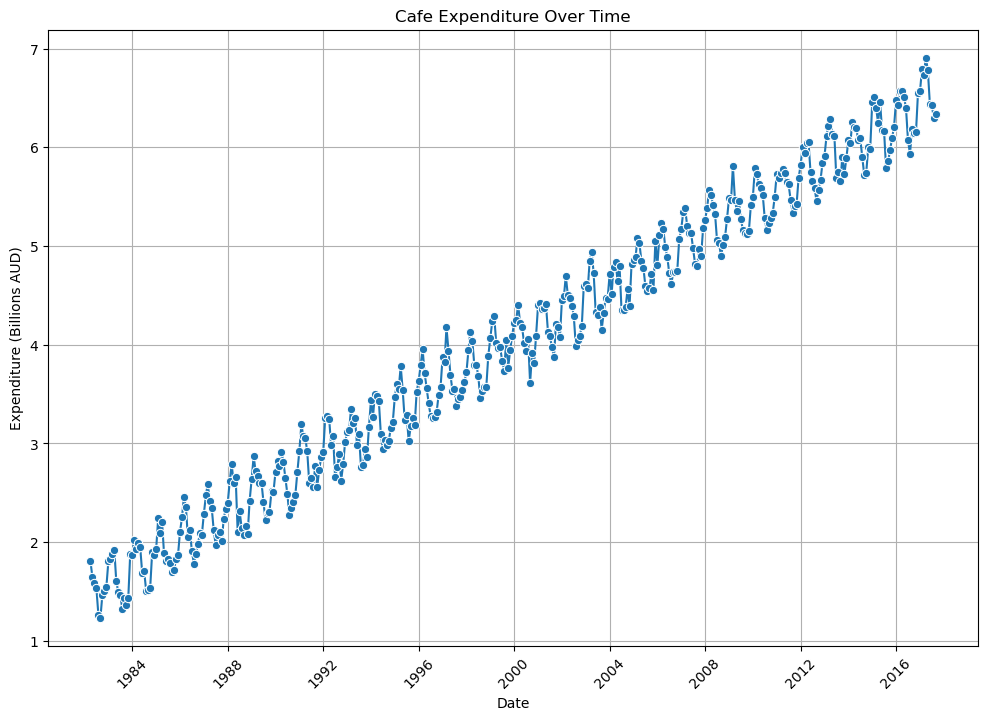

In [5]:
#Loading the dataset
df = pd.read_csv('auscafe_simulated.csv')
df.head()

#Fixing Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Plotting Time Series
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='Expenditure_Billions_AUD', marker='o')
plt.title('Cafe Expenditure Over Time')
plt.xlabel('Date')
plt.ylabel('Expenditure (Billions AUD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Time Series Decomposition

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Decompose and plot the time series components.</p>
    
<b>Insert your code cell after this.</b>     
</div>

In [6]:
marks += 3

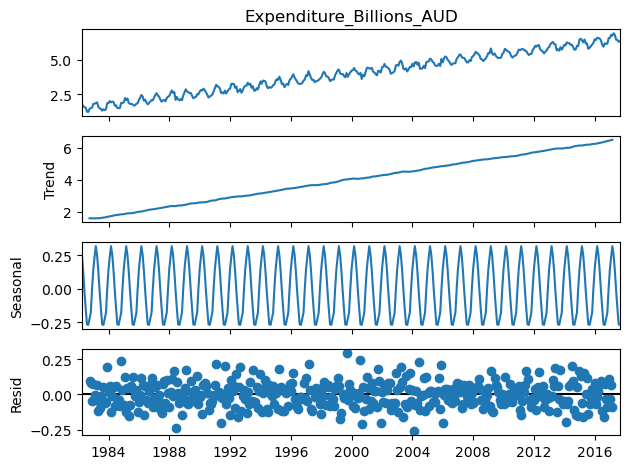

In [7]:
#Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.set_index('Date')['Expenditure_Billions_AUD'], model='additive')
result.plot()
plt.show()

## Stationarity check

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Check for stationarity using the Augmented Dickey-Fuller test (ADF) and print the results.</p> 
<b>Insert your code cell after this.</b>
</div>

In [8]:
marks += 3

In [9]:
#Stationary check using ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Expenditure_Billions_AUD'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary. Differencing is needed.")


ADF Statistic: 0.5991018835021283
p-value: 0.9875934712071985
The time series is non-stationary. Differencing is needed.


<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Difference the series (<b>if needed</b>) and recheck (ADF) and print the results.</p> 
<b>Insert your code cell after this.</b>
</div>

In [10]:
marks += 3

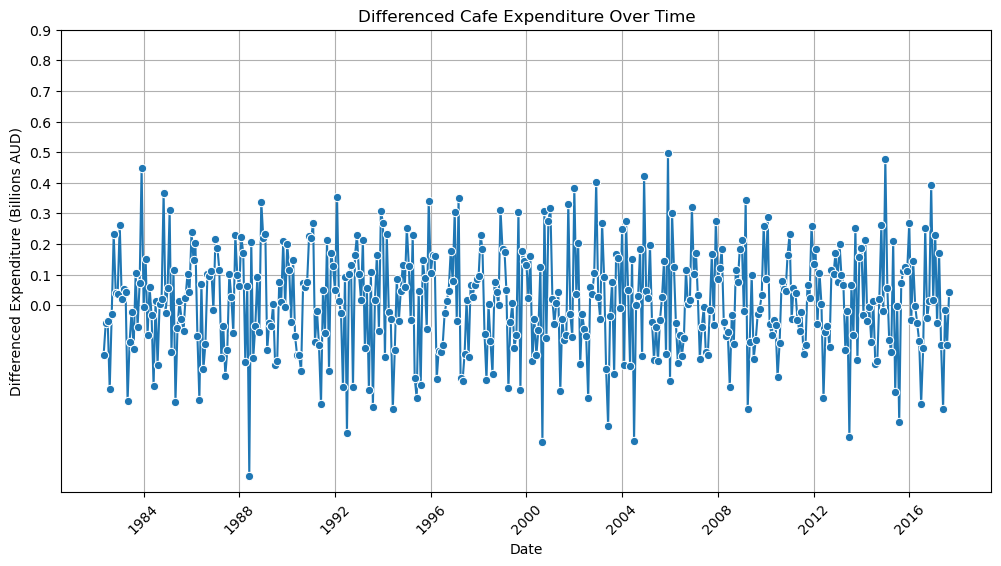

In [11]:
#Differencing the time series
df['Expenditure_Diff'] = df['Expenditure_Billions_AUD'].diff()
df.dropna(inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Expenditure_Diff', marker='o')
plt.title('Differenced Cafe Expenditure Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Expenditure (Billions AUD)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Interpret the ADF test results before and after differencing. Was differencing necessary</p>
    
<b>Insert your markdown cell with your answer after this.</b>    
</div>

In [12]:
marks += 3

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Plot the ACF and PACF.</p>

<b>Insert your code cell after this.</b>
</div>

In [13]:
marks += 3

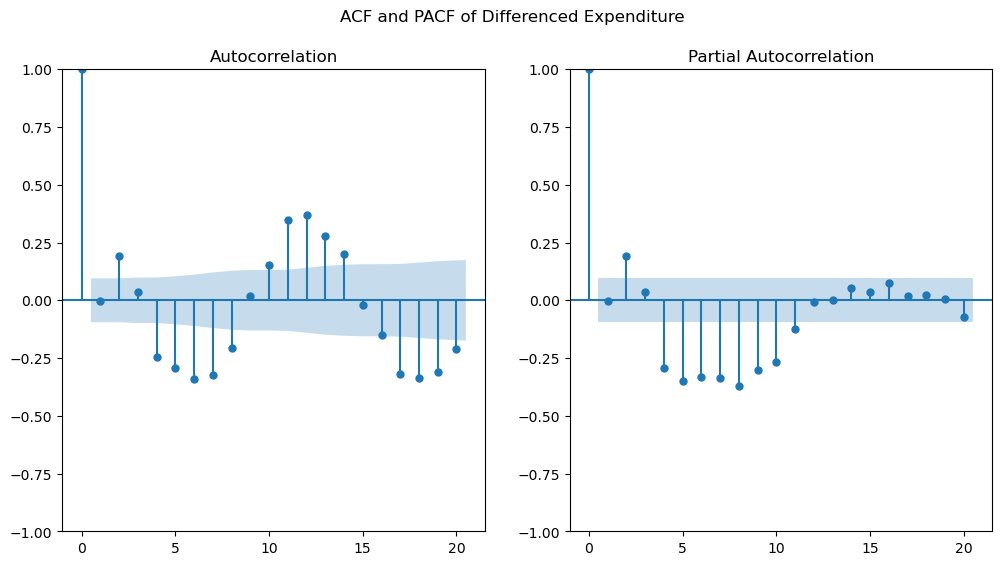

In [14]:
#Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(df['Expenditure_Diff'], lags=20, ax=plt.subplot(121))
plot_pacf(df['Expenditure_Diff'], lags=20, ax=plt.subplot(122))
plt.suptitle('ACF and PACF of Differenced Expenditure')
plt.show()


# Model

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p> Based on your ACF and PACF plots choose a suitable choice of <b>p</b> and <b>q</b> and fit an ARIMA model.
    
<b>Insert your code cell after this.</b>    
</div>

In [15]:
marks += 5

In [16]:
#Choosing suitable choice of p and q to fit ARIMA model
# Based on ACF and PACF plots, we can choose p=1 and q=1 for the ARIMA model.
# Fitting the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Expenditure_Billions_AUD'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                                  SARIMAX Results                                   
Dep. Variable:     Expenditure_Billions_AUD   No. Observations:                  425
Model:                       ARIMA(1, 1, 1)   Log Likelihood                 136.716
Date:                      Tue, 24 Jun 2025   AIC                           -267.432
Time:                              01:38:02   BIC                           -255.282
Sample:                                   0   HQIC                          -262.632
                                      - 425                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4102      0.868      0.473      0.636      -1.291       2.111
ma.L1         -0.3640      0.885     -0.411      0.681      -2.099       1.371
sigm

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Model Evaluation

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Plot and comment on the residuals</p>
    
<b>Insert your code cell after this.</b>
</div>

In [17]:
marks += 3

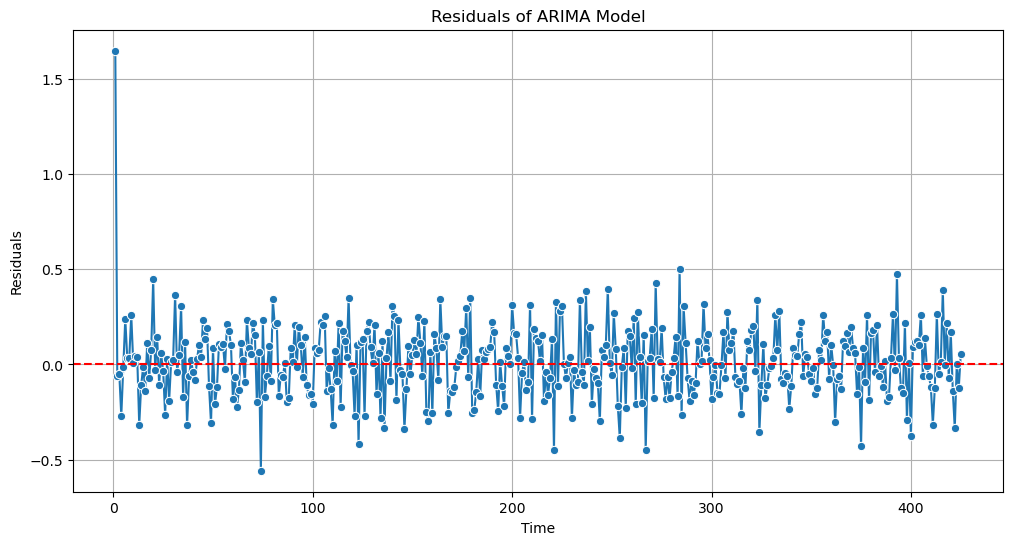

In [ ]:
#Plotting and commenting on residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
sns.lineplot(data=residuals, marker='o')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()

# Forecasting

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Forecast the cafe sales for the next 48 months, and comment on the forecast.</p>
    
<b>Insert your code cell after this.</b>
</div>

In [19]:
marks += 3

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\kamot\AppData\Local\Temp\ipykernel_15172\537374681.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=49, freq='H')[1:], forecast, marker='o', label='Forecast', color='orange')


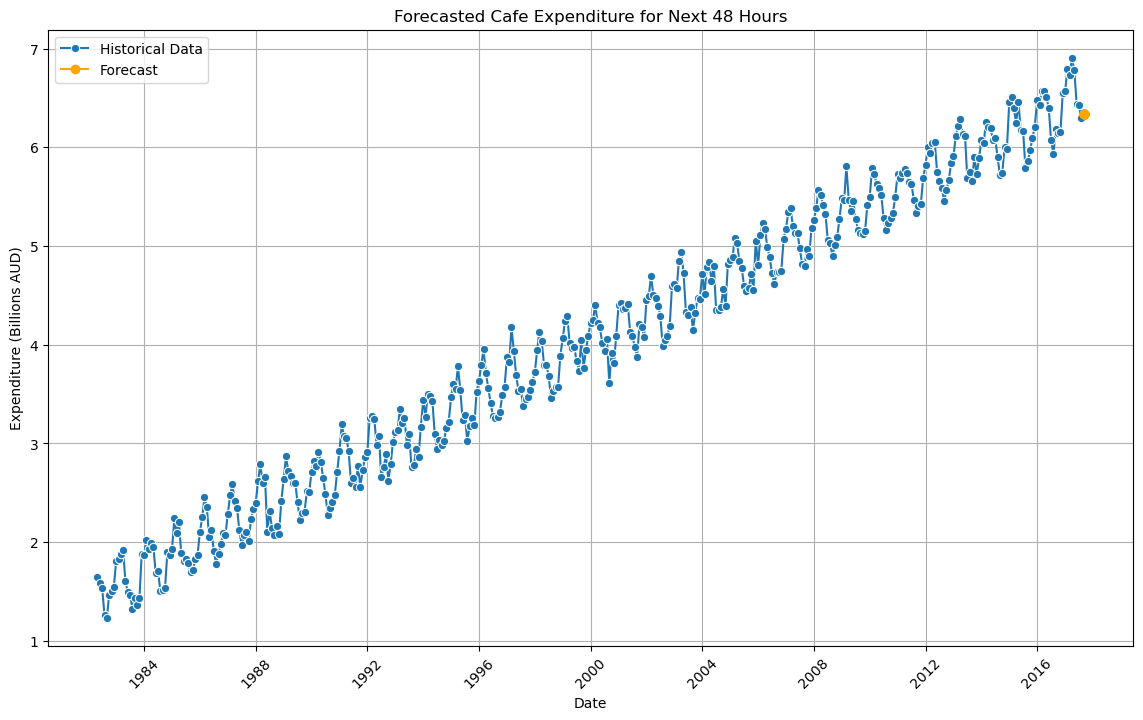

In [20]:
#Forecasting sales for next 48 hours
forecast = model_fit.forecast(steps=48)
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Expenditure_Billions_AUD', marker='o', label='Historical Data')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=49, freq='H')[1:], forecast, marker='o', label='Forecast', color='orange')
plt.title('Forecasted Cafe Expenditure for Next 48 Hours')
plt.xlabel('Date')
plt.ylabel('Expenditure (Billions AUD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

## 

<b><font size="5">Total Marks:</font></b>

In [21]:
print(f"Total Marks = {marks} / 30")

Total Marks = 30 / 30
